# CPS305 Fall 2019
## Lab $06$ Report
## Mister Elijah Tungul, Std ID 500885285

28 October 2019

# Introduction and Overall Comments

This is the submission of Elijah Tungul. This lab presents the performance comparisons of canonical quicksort versus the "median-of-three" quicksort. An experiment was performed to verify the hypothesis that "Canonic quickSort is as fast as mo3_quickSort when processing large lists of unsorted integers". The method I chose to experiment my functions is by having a randomly generated list from a range of 10-1000, and have the interval increase by 10. Overall, the implementation of the median of three method wasn't too difficult, but getting the timeit and graph functions was fairly tough.

## Solution for Exercise 1

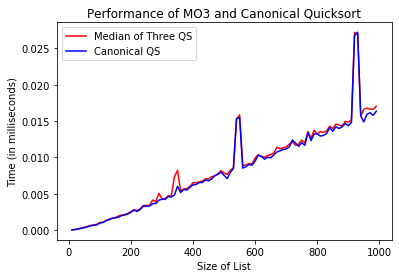

In [7]:
import timeit
import random
import matplotlib.pyplot as plt

def mo3_quicksort(alist):
    mo3_quicksort_helper(alist, 0, len(alist)-1)

def mo3_quicksort_helper(alist, first, last):
    if first < last:
        split = mo3_partition(alist,first,last)
        mo3_quicksort_helper(alist, first, split-1)
        mo3_quicksort_helper(alist, split+1, last)

def mo3_partition(alist,first,last):
   pivotvalue = mo3(alist, first, last)
   leftmark = first+1
   rightmark = last
   done = False
   while not done:
       while leftmark <= rightmark and alist[leftmark] <= pivotvalue:
           leftmark = leftmark + 1
       while alist[rightmark] >= pivotvalue and rightmark >= leftmark:
           rightmark = rightmark -1
       if rightmark < leftmark:
           done = True
       else:
           temp = alist[leftmark]
           alist[leftmark] = alist[rightmark]
           alist[rightmark] = temp
   temp = alist[first]
   alist[first] = alist[rightmark]
   alist[rightmark] = temp
   return rightmark

def mo3(alist, first, last):
    middle = (last-first)//2 + first
    if(alist[middle] < alist[first]):
        swap(alist, middle, first)
    if(alist[last] < alist[first]):
        swap(alist, last, first)
    if(alist[middle] < alist[last]):
        swap(alist, middle, last)
    return alist[first]

def swap(alist, first, last):
    temp = alist[first]
    alist[first] = alist[last]
    alist[last] = temp

########################################

def quickSort(alist):
   quickSortHelper(alist,0,len(alist)-1)

def quickSortHelper(alist,first,last):
   if first<last:
       splitpoint = partition(alist,first,last)
       quickSortHelper(alist,first,splitpoint-1)
       quickSortHelper(alist,splitpoint+1,last)

def partition(alist,first,last):
   pivotvalue = alist[first]
   leftmark = first+1
   rightmark = last
   done = False
   while not done:
       while leftmark <= rightmark and alist[leftmark] <= pivotvalue:
           leftmark = leftmark + 1
       while alist[rightmark] >= pivotvalue and rightmark >= leftmark:
           rightmark = rightmark -1
       if rightmark < leftmark:
           done = True
       else:
           temp = alist[leftmark]
           alist[leftmark] = alist[rightmark]
           alist[rightmark] = temp
   temp = alist[first]
   alist[first] = alist[rightmark]
   alist[rightmark] = temp
   return rightmark

########################################

y_mo3 = []
y_canon = []
reps = 10
rng = range(10, 1000, 10)
for i in rng:
    for j in range(reps):
        t = timeit.Timer("mo3_quicksort(x)", "from __main__ import x, mo3_quicksort")
        t2 = timeit.Timer("quickSort(x)", "from __main__ import x, quickSort")
        x = [random.randint(10,100) for j in range(i)]
        y_mo3_time = t.timeit(number=10)
        y_canon_time = t2.timeit(number=10)
    y_mo3.append(y_mo3_time/reps)
    y_canon.append(y_canon_time/reps)
x = rng
plt.plot(x, y_mo3, 'r', label="Median of Three QS")
plt.plot(x, y_canon, 'b', label="Canonical QS")
plt.title("Performance of MO3 and Canonical Quicksort")
plt.xlabel("Size of List")
plt.ylabel("Time (in milliseconds)")
plt.legend()
plt.show()

**Discussion of the Results**

The graph shows that the hypothesis is mostly correct. Even with few errors, the canonical quicksort is as fast as "median-of-three" quicksort (at about O(n log n)). 
